# Part I - (Prosper Loan Data Exploration)
## by (Lawrence Appiah-Nuamah)


## Preliminary Wrangling
> This document explores a dataset containing  approximately 56000 Loans of people and with about 81 variables such as the borrower rate (or interest rate), current loan status, borrower income, loan amount and many others.


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [3]:
#Load in the dataset into the pandas dataframe
df = pd.read_csv('prosperLoanData.csv', low_memory=False)
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,258.0
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,158.0
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55262,BA1D3566574197876DCC48C,687825,2012-12-17 15:49:01.583000000,NaN,36,Current,NaN,0.24758,0.2099,0.1999,...,-149.78,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,261.0
55263,A0FA3392211419017FDE6A5,147983,2007-06-06 16:49:54.177000000,B,36,Completed,2010-06-13 00:00:00,0.15792,0.1490,0.1240,...,-33.13,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,65.0
55264,A0FB3588549152778C6F0B6,899274,2013-09-11 10:04:40.400000000,NaN,36,Current,NaN,0.33215,0.2925,0.2825,...,-12.12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
55265,69603483509780973F7A37E,456079,2010-04-27 20:22:19.820000000,NaN,36,Completed,2013-05-06 00:00:00,0.07439,0.0710,0.0610,...,-55.95,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,129.0


In [4]:
#This checks the dimension of the dataframe
df.shape

(55267, 81)

In [5]:
#Gives the datatype of all columns
df.dtypes

ListingKey                      object
ListingNumber                    int64
ListingCreationDate             object
CreditGrade                     object
Term                             int64
                                ...   
PercentFunded                  float64
Recommendations                float64
InvestmentFromFriendsCount     float64
InvestmentFromFriendsAmount    float64
Investors                      float64
Length: 81, dtype: object

In [6]:
#Listing Columns names in a list
df.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [7]:
#Change some of the datatype of the columns into it correct datatype
df[['ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'LoanOriginationDate', 'FirstRecordedCreditLine']] = df[['ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'LoanOriginationDate', 'FirstRecordedCreditLine']].astype('datetime64[ns]')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55267 entries, 0 to 55266
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ListingKey                           55267 non-null  object        
 1   ListingNumber                        55267 non-null  int64         
 2   ListingCreationDate                  55267 non-null  datetime64[ns]
 3   CreditGrade                          14053 non-null  object        
 4   Term                                 55267 non-null  int64         
 5   LoanStatus                           55267 non-null  object        
 6   ClosedDate                           26756 non-null  datetime64[ns]
 7   BorrowerAPR                          55259 non-null  float64       
 8   BorrowerRate                         55266 non-null  float64       
 9   LenderYield                          55266 non-null  float64       
 10  EstimatedE

In [9]:
#Print the first 7 rows
df.head(7)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263,C,36,Completed,2009-08-14,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,258.0
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900,NaN,36,Current,NaT,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090,HR,36,Completed,2009-12-17,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,41.0
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010,NaN,36,Current,NaT,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,158.0
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097,NaN,36,Current,NaT,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20.0
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093,NaN,60,Current,NaT,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147,NaN,36,Current,NaT,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [35]:
#Checking the number of null values in each column
null_value =df.isnull().sum()
null_value

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    41214
Term                               0
                               ...  
PercentFunded                      1
Recommendations                    1
InvestmentFromFriendsCount         1
InvestmentFromFriendsAmount        1
Investors                          1
Length: 81, dtype: int64

In [36]:
#Dropping all null value
#df.dropna(inplace=True)

In [37]:
df['IncomeRange'].value_counts()

$25,000-49,999    15628
$50,000-74,999    15146
$100,000+          8453
$75,000-99,999     8097
Not displayed      3744
$1-24,999          3541
Not employed        360
$0                  297
Name: IncomeRange, dtype: int64

In [38]:
#Verifying if the null values has been dropped
#df.isnull().sum()

In [39]:
#Check the number of duplicates
sum(df.duplicated())

0

In [40]:
#Give a summary of your data
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,5.526700e+04,55267.000000,55259.000000,55266.000000,55266.000000,41155.000000,41155.000000,41155.000000,41155.000000,41155.000000,...,55266.000000,55266.000000,55266.000000,55266.000000,55266.000000,55266.000000,55266.000000,55266.000000,55266.000000,55266.000000
mean,6.283027e+05,40.851937,0.218563,0.192556,0.182495,0.168441,0.080242,0.095938,4.077293,5.962848,...,-54.891990,-14.376396,701.128724,682.093794,25.229559,0.998660,0.047118,0.023106,15.643532,80.381754
std,3.279084e+05,10.426270,0.080427,0.074882,0.074581,0.068664,0.046900,0.030502,1.672782,2.376339,...,61.084587,114.895958,2393.931887,2364.760010,276.739647,0.017356,0.341346,0.258240,272.738609,103.122941
min,6.000000e+00,12.000000,0.008640,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.012810e+05,36.000000,0.156290,0.133400,0.123500,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.085000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,5.999080e+05,36.000000,0.209310,0.183550,0.173000,0.161500,0.069900,0.091400,4.000000,6.000000,...,-34.355000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.933795e+05,36.000000,0.283700,0.250000,0.240000,0.224300,0.112000,0.116000,5.000000,8.000000,...,-13.780000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.266700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.004500,39.000000,33.000000,23699.520000,1035.000000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55267 entries, 0 to 55266
Data columns (total 81 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   ListingKey                           55267 non-null  object        
 1   ListingNumber                        55267 non-null  int64         
 2   ListingCreationDate                  55267 non-null  datetime64[ns]
 3   CreditGrade                          14053 non-null  object        
 4   Term                                 55267 non-null  int64         
 5   LoanStatus                           55267 non-null  object        
 6   ClosedDate                           26756 non-null  datetime64[ns]
 7   BorrowerAPR                          55259 non-null  float64       
 8   BorrowerRate                         55266 non-null  float64       
 9   LenderYield                          55266 non-null  float64       
 10  EstimatedE

In [42]:
df['LP_CustomerPayments'].head(10)

0    11396.14
1        0.00
2     4186.63
3     5143.20
4     2819.85
5      679.34
6     1226.70
7     3353.40
8      611.08
9      611.08
Name: LP_CustomerPayments, dtype: float64

In [43]:
df[['LoanOriginalAmount', 'MonthlyLoanPayment', 'IncomeRange', 'StatedMonthlyIncome', 'LoanStatus', 'DebtToIncomeRatio', 'PercentFunded', 'LP_InterestandFees']].head(12)

,LoanOriginalAmount,MonthlyLoanPayment,IncomeRange,StatedMonthlyIncome,LoanStatus,DebtToIncomeRatio,PercentFunded,LP_InterestandFees
0,9425.0,330.43,"$25,000-49,999",3083.333333,Completed,0.17,1.0,1971.14
1,10000.0,318.93,"$50,000-74,999",6125.000000,Current,0.18,1.0,0.00
2,3001.0,123.32,Not displayed,2083.333333,Completed,0.06,1.0,1185.63
3,10000.0,321.45,"$25,000-49,999",2875.000000,Current,0.15,1.0,1052.11
4,15000.0,563.97,"$100,000+",9583.333333,Current,0.26,1.0,1256.63
5,15000.0,342.37,"$100,000+",8333.333333,Current,0.36,1.0,327.45
6,3000.0,122.67,"$25,000-49,999",2083.333333,Current,0.27,1.0,622.45
7,10000.0,372.60,"$25,000-49,999",3355.750000,Current,0.24,1.0,1397.51
8,10000.0,305.54,"$25,000-49,999",3333.333333,Current,0.25,1.0,105.50
9,10000.0,305.54,"$25,000-49,999",3333.333333,Current,0.25,1.0,105.50


In [44]:
#To get a sample of the data
df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
22978,059C3589970181854B8B79E,901450,2013-09-16 20:43:23.213,NaN,60,Current,NaT,0.21115,0.1870,0.1770,...,-61.57,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,63.0
25451,122F34314012688538A5DFE,393908,2008-09-06 11:13:29.707,AA,36,Chargedoff,2010-01-19,0.10140,0.0945,0.0845,...,-80.18,0.0,7236.56,7236.56,0.0,1.0,0.0,0.0,0.0,369.0
32688,66E635594847461536496E7,654736,2012-10-15 11:27:47.857,NaN,36,Current,NaT,0.35797,0.3177,0.3077,...,-45.64,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,45.0
19230,580D3469896083741065ADC,435179,2009-11-24 12:59:40.173,NaN,36,Completed,2012-12-03,0.34781,0.3111,0.3011,...,-19.43,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,42.0
49111,902F360162551657993A190,1138096,2014-01-29 15:37:31.340,NaN,36,Current,NaT,0.12691,0.0990,0.0890,...,0.00,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,300.0
48317,3A593564040508755843AB3,682587,2012-12-04 15:33:39.213,NaN,12,Completed,2013-07-05,0.24369,0.1656,0.1556,...,-25.49,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,128.0
43467,C417358541371733175F46B,852556,2013-07-26 13:43:44.707,NaN,36,Completed,2014-02-18,0.13697,0.1089,0.0989,...,-12.90,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,1.0
33649,C9FF35684194774626F5F95,701942,2013-01-20 21:07:13.620,NaN,36,Current,NaT,0.06726,0.0605,0.0505,...,-59.65,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,249.0
4461,0FB833908942234616F7454,147920,2007-06-06 15:30:01.610,B,36,Defaulted,2009-02-20,0.14207,0.1350,0.1150,...,-78.41,0.0,4740.97,4740.98,0.0,1.0,0.0,0.0,0.0,186.0
5873,6A8C359086901893612DAAD,916393,2013-09-20 15:53:07.037,NaN,36,Current,NaT,0.33215,0.2925,0.2825,...,-11.98,0.0,0.00,0.00,0.0,1.0,0.0,0.0,0.0,1.0


In [45]:
df['LoanNumber'].head(10)

0     19141.0
1    134815.0
2      6466.0
3     77296.0
4    102670.0
5    123257.0
6     88353.0
7     90051.0
8    121268.0
9    121268.0
Name: LoanNumber, dtype: float64

In [46]:
df['EstimatedReturn'].head(10)

0        NaN
1    0.05470
2        NaN
3    0.06000
4    0.09066
5    0.07077
6    0.11070
7    0.09840
8    0.04231
9    0.04231
Name: EstimatedReturn, dtype: float64

In [47]:
df['EstimatedEffectiveYield'].head(10)

0        NaN
1    0.07960
2        NaN
3    0.08490
4    0.18316
5    0.11567
6    0.23820
7    0.17830
8    0.05221
9    0.05221
Name: EstimatedEffectiveYield, dtype: float64

In [48]:
df['LenderYield'].head(10)

0    0.1380
1    0.0820
2    0.2400
3    0.0874
4    0.1985
5    0.1214
6    0.2612
7    0.1919
8    0.0529
9    0.0529
Name: LenderYield, dtype: float64

### What is the structure of your dataset?

> There are 55267 loans in the dataset with 81 features (ListingKey, ListingNumber, ListingCreationData, CreditGrade, Term, LoanStatus, etc). Most of the features have the datatype float that's 59 of them  and 20 string values and 2 features with the integer datatype.

### What is/are the main feature(s) of interest in your dataset?

> I am very much interest to find out what features or factors that affect a loan's outcome status?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Currently, I am looking at these features: Occupation, BorrowerStatus, IncomeRange, AvailableBankCardCredit, LoanOriginalAmount, EmploymentStatus, EmploymentStatusDuration, BorrowerRate, StatedMonthlyIncome, DebtToIncomeRatio,Term, BorrowerAPR,and LoanNumber as an index.

In [49]:
#We want to select some few variables and analyse it 
#df[['LoanOriginalAmount', 'MonthlyLoanPayment', 'IncomeRange', 'StatedMonthlyIncome', 'LoanStatus', 'DebtToIncomeRatio', 'PercentFunded', 'LP_InterestandFees']].head(12)

new_df = df[['ListingCreationDate', 'Occupation', 'ProsperScore' ,'BorrowerState', 'IncomeRange', 'AvailableBankcardCredit', 'ClosedDate', 'LoanOriginalAmount', 'EmploymentStatus', 'ListingCategory (numeric)', 'LenderYield', 'EmploymentStatusDuration', 'BorrowerRate', 'LoanStatus','LP_InterestandFees','StatedMonthlyIncome','MonthlyLoanPayment', 'DebtToIncomeRatio', 'LP_ServiceFees','Term', 'BorrowerAPR']]
new_df

,ListingCreationDate,Occupation,ProsperScore,BorrowerState,IncomeRange,AvailableBankcardCredit,ClosedDate,LoanOriginalAmount,EmploymentStatus,ListingCategory (numeric),...,EmploymentStatusDuration,BorrowerRate,LoanStatus,LP_InterestandFees,StatedMonthlyIncome,MonthlyLoanPayment,DebtToIncomeRatio,LP_ServiceFees,Term,BorrowerAPR
0,2007-08-26 19:09:29.263,Other,NaN,CO,"$25,000-49,999",1500.0,2009-08-14,9425.0,Self-employed,0.0,...,2.0,0.1580,Completed,1971.1400,3083.333333,330.43,0.17,-133.18,36,0.16516
1,2014-02-27 08:28:07.900,Professional,7.0,CO,"$50,000-74,999",10266.0,NaT,10000.0,Employed,2.0,...,44.0,0.0920,Current,0.0000,6125.000000,318.93,0.18,0.00,36,0.12016
2,2007-01-05 15:00:47.090,Other,NaN,GA,Not displayed,NaN,2009-12-17,3001.0,Not available,0.0,...,NaN,0.2750,Completed,1185.6300,2083.333333,123.32,0.06,-24.20,36,0.28269
3,2012-10-22 11:02:35.010,Skilled Labor,9.0,GA,"$25,000-49,999",30754.0,NaT,10000.0,Employed,16.0,...,113.0,0.0974,Current,1052.1100,2875.000000,321.45,0.15,-108.01,36,0.12528
4,2013-09-14 18:38:39.097,Executive,4.0,MN,"$100,000+",695.0,NaT,15000.0,Employed,2.0,...,44.0,0.2085,Current,1256.6300,9583.333333,563.97,0.26,-60.27,36,0.24614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55262,2012-12-17 15:49:01.583,Other,7.0,OH,"$25,000-49,999",13080.0,NaT,15000.0,Other,3.0,...,83.0,0.2099,Current,3152.3100,2750.000000,565.05,0.63,-149.78,36,0.24758
55263,2007-06-06 16:49:54.177,Other,NaN,AL,"$25,000-49,999",34.0,2010-06-13,2000.0,Full-time,0.0,...,309.0,0.1490,Completed,444.0000,2500.000000,69.23,0.26,-33.13,36,0.15792
55264,2013-09-11 10:04:40.400,Sales - Retail,2.0,NJ,"$25,000-49,999",2010.0,NaT,3000.0,Employed,1.0,...,80.0,0.2925,Current,351.9959,3000.000000,126.13,0.14,-12.12,36,0.33215
55265,2010-04-27 20:22:19.820,Professional,10.0,VA,"$25,000-49,999",13693.0,2013-05-06,3500.0,Full-time,3.0,...,23.0,0.0710,Completed,397.3600,4150.833333,108.23,0.04,-55.95,36,0.07439


In [50]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55267 entries, 0 to 55266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ListingCreationDate        55267 non-null  datetime64[ns]
 1   Occupation                 53557 non-null  object        
 2   ProsperScore               41155 non-null  float64       
 3   BorrowerState              52629 non-null  object        
 4   IncomeRange                55266 non-null  object        
 5   AvailableBankcardCredit    51616 non-null  float64       
 6   ClosedDate                 26756 non-null  datetime64[ns]
 7   LoanOriginalAmount         55266 non-null  float64       
 8   EmploymentStatus           54198 non-null  object        
 9   ListingCategory (numeric)  55266 non-null  float64       
 10  LenderYield                55266 non-null  float64       
 11  EmploymentStatusDuration   51580 non-null  float64       
 12  Borr

In [51]:
#Give a summary of your data
new_df.describe()

,ProsperScore,AvailableBankcardCredit,LoanOriginalAmount,ListingCategory (numeric),LenderYield,EmploymentStatusDuration,BorrowerRate,LP_InterestandFees,StatedMonthlyIncome,MonthlyLoanPayment,DebtToIncomeRatio,LP_ServiceFees,Term,BorrowerAPR
count,41155.000000,51616.000000,55266.000000,55266.000000,55266.000000,51580.000000,55266.000000,55266.000000,5.526600e+04,55266.000000,51181.000000,55266.000000,55267.000000,55259.000000
mean,5.962848,11247.779991,8338.609851,2.776608,0.182495,95.922489,0.192556,1080.028187,5.619012e+03,272.271907,0.276288,-54.891990,40.851937,0.218563
std,2.376339,19863.036686,6248.733566,3.990462,0.074581,94.430296,0.074882,1191.047069,9.333132e+03,191.903943,0.550618,61.084587,10.426270,0.080427
min,1.000000,0.000000,1000.000000,0.000000,-0.010000,0.000000,0.000000,-2.349900,0.000000e+00,0.000000,0.000000,-664.870000,12.000000,0.008640
25%,4.000000,885.000000,4000.000000,1.000000,0.123500,25.000000,0.133400,271.462500,3.208333e+03,131.427500,0.140000,-73.085000,36.000000,0.156290
50%,6.000000,4123.000000,6500.000000,1.000000,0.173000,67.000000,0.183550,700.150000,4.666667e+03,217.740000,0.220000,-34.355000,36.000000,0.209310
75%,8.000000,13183.250000,12000.000000,3.000000,0.240000,137.000000,0.250000,1459.400000,6.782417e+03,372.150000,0.320000,-13.780000,36.000000,0.283700
max,11.000000,646285.000000,35000.000000,20.000000,0.492500,755.000000,0.497500,14329.490000,1.750003e+06,2218.530000,10.010000,32.060000,60.000000,0.512290


In [52]:
#Check for null values
new_df.isnull().sum()

ListingCreationDate              0
Occupation                    1710
ProsperScore                 14112
BorrowerState                 2638
IncomeRange                      1
AvailableBankcardCredit       3651
ClosedDate                   28511
LoanOriginalAmount               1
EmploymentStatus              1069
ListingCategory (numeric)        1
LenderYield                      1
EmploymentStatusDuration      3687
BorrowerRate                     1
LoanStatus                       0
LP_InterestandFees               1
StatedMonthlyIncome              1
MonthlyLoanPayment               1
DebtToIncomeRatio             4086
LP_ServiceFees                   1
Term                             0
BorrowerAPR                      8
dtype: int64

In [53]:
#Convert IncomeRange to ordinal categorical
# ordinal_var_dict = {'IncomeRange': ['$0', '$1-24,999', '$25, 000-49, 999', '$50, 000-74, 999', '$75, 000-99, 999', '$100, 000+']}
# for var in ordinal_var_dict:
#     ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories= ordinal_var_dict[var])
#     new_df[var] = new_df[var].astype(ordered_var)

In [54]:
new_df['IncomeRange'].value_counts()

$25,000-49,999    15628
$50,000-74,999    15146
$100,000+          8453
$75,000-99,999     8097
Not displayed      3744
$1-24,999          3541
Not employed        360
$0                  297
Name: IncomeRange, dtype: int64

In [55]:
#Adjust datatype for all other categorical columns
new_df['Occupation'] = new_df['Occupation'].astype('category')
new_df['BorrowerState'] = new_df['BorrowerState'].astype('category')
new_df['LoanStatus'] = new_df['LoanStatus'].astype('category')
new_df['ListingCategory (numeric)'] = new_df ['ListingCategory (numeric)'].astype('category')
new_df['EmploymentStatus'] = new_df['EmploymentStatus'].astype('category')

C:\Users\ODBC\AppData\Local\Temp\ipykernel_7392\173192716.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Occupation'] = new_df['Occupation'].astype('category')
C:\Users\ODBC\AppData\Local\Temp\ipykernel_7392\173192716.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['BorrowerState'] = new_df['BorrowerState'].astype('category')
C:\Users\ODBC\AppData\Local\Temp\ipykernel_7392\173192716.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [56]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55267 entries, 0 to 55266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ListingCreationDate        55267 non-null  datetime64[ns]
 1   Occupation                 53557 non-null  category      
 2   ProsperScore               41155 non-null  float64       
 3   BorrowerState              52629 non-null  category      
 4   IncomeRange                55266 non-null  object        
 5   AvailableBankcardCredit    51616 non-null  float64       
 6   ClosedDate                 26756 non-null  datetime64[ns]
 7   LoanOriginalAmount         55266 non-null  float64       
 8   EmploymentStatus           54198 non-null  category      
 9   ListingCategory (numeric)  55266 non-null  category      
 10  LenderYield                55266 non-null  float64       
 11  EmploymentStatusDuration   51580 non-null  float64       
 12  Borr

In [57]:
new_df.sample(10)

,ListingCreationDate,Occupation,ProsperScore,BorrowerState,IncomeRange,AvailableBankcardCredit,ClosedDate,LoanOriginalAmount,EmploymentStatus,ListingCategory (numeric),...,EmploymentStatusDuration,BorrowerRate,LoanStatus,LP_InterestandFees,StatedMonthlyIncome,MonthlyLoanPayment,DebtToIncomeRatio,LP_ServiceFees,Term,BorrowerAPR
27962,2008-07-04 20:16:34.363,Other,NaN,KY,"$75,000-99,999",14146.0,2009-03-13,1200.0,Full-time,7.0,...,173.0,0.3500,Chargedoff,110.0700,7083.333333,54.28,0.33,-3.33,36,0.37453
51253,2011-11-07 09:11:47.977,Sales - Retail,5.0,FL,"$25,000-49,999",12894.0,2012-08-16,10000.0,Self-employed,3.0,...,94.0,0.2599,Completed,1785.6700,2500.000000,402.85,NaN,-68.72,36,0.29510
3595,2008-07-23 18:32:06.317,Other,NaN,FL,"$25,000-49,999",1693.0,2011-08-05,7500.0,Full-time,1.0,...,26.0,0.1415,Completed,1750.8800,3750.000000,238.69,0.17,-123.73,36,0.16309
14384,2009-10-12 17:17:37.507,Teacher,9.0,PA,"$50,000-74,999",34610.0,2012-02-01,7000.0,Full-time,1.0,...,57.0,0.1040,Completed,1099.4300,5833.333333,227.19,0.18,-105.71,36,0.12511
30343,2007-08-16 21:20:12.380,Car Dealer,NaN,CA,"$25,000-49,999",4793.0,2008-03-27,4000.0,Full-time,0.0,...,9.0,0.2750,Chargedoff,214.7900,2166.666667,164.38,0.23,-7.81,36,0.28951
11986,2014-01-03 19:26:56.083,Laborer,3.0,PA,"$50,000-74,999",3999.0,NaT,15000.0,Employed,1.0,...,123.0,0.1465,Current,180.6195,5000.000000,517.41,0.24,-12.74,36,0.18275
36612,2013-08-02 06:34:46.997,Truck Driver,4.0,KY,"$50,000-74,999",410.0,NaT,15000.0,Employed,7.0,...,116.0,0.2159,Current,1540.3974,4166.666667,569.68,0.35,-71.77,36,0.25371
33580,2008-06-23 16:35:27.030,Professional,NaN,VA,"$100,000+",404.0,2009-02-03,7500.0,Full-time,7.0,...,143.0,0.2294,Chargedoff,331.0500,9000.000000,290.09,0.19,-14.43,36,0.25217
23753,2013-05-13 07:35:54.557,Sales - Retail,3.0,CA,"$1-24,999",3398.0,NaT,4000.0,Employed,1.0,...,45.0,0.2712,Current,754.5079,2000.000000,163.56,0.23,-27.92,36,0.31032
39599,2011-11-24 06:38:29.023,Accountant/CPA,7.0,OR,"$50,000-74,999",617.0,2013-01-29,2000.0,Employed,1.0,...,63.0,0.2561,Completed,518.3800,5250.000000,80.17,0.18,-20.25,36,0.29486


In [58]:
#new_df['LoanNumber'].fillna(0)



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Let's do some visualization

TypeError: 'value' must be an instance of str or bytes, not a float

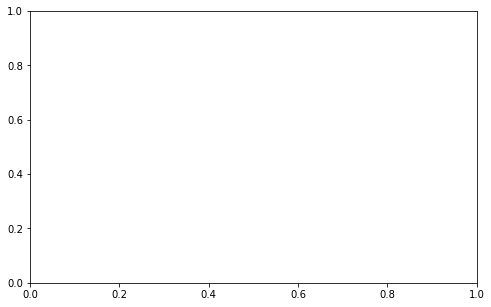

In [59]:
#Let's do some visualization
plt.figure(figsize=[8, 5])
plt.hist(data=new_df, x='IncomeRange')
plt.xlabel('Income Range')
plt.title('A Graph showing the Income Range of the Borrower')
plt.xticks(rotation=(90))
plt.show()

In [60]:
new_df['EmploymentStatusDuration'].fillna(0, inplace=True)

C:\Users\ODBC\AppData\Local\Temp\ipykernel_7392\2022856650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['EmploymentStatusDuration'].fillna(0, inplace=True)


In [61]:
#Checking if the column contains null values
new_df['EmploymentStatusDuration'].isnull().sum()

0

In [62]:
#Changing the datatype of a column from float into int
new_df['EmploymentStatusDuration'] = new_df['EmploymentStatusDuration'].astype(int)

C:\Users\ODBC\AppData\Local\Temp\ipykernel_7392\1149654866.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['EmploymentStatusDuration'] = new_df['EmploymentStatusDuration'].astype(int)


In [63]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55267 entries, 0 to 55266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ListingCreationDate        55267 non-null  datetime64[ns]
 1   Occupation                 53557 non-null  category      
 2   ProsperScore               41155 non-null  float64       
 3   BorrowerState              52629 non-null  category      
 4   IncomeRange                55266 non-null  object        
 5   AvailableBankcardCredit    51616 non-null  float64       
 6   ClosedDate                 26756 non-null  datetime64[ns]
 7   LoanOriginalAmount         55266 non-null  float64       
 8   EmploymentStatus           54198 non-null  category      
 9   ListingCategory (numeric)  55266 non-null  category      
 10  LenderYield                55266 non-null  float64       
 11  EmploymentStatusDuration   55267 non-null  int32         
 12  Borr

In [64]:
#new_df.plot(x='IncomeRange', kind='bar');
new_df['LoanOriginalAmount'] = new_df['LoanOriginalAmount'].dropna()

C:\Users\ODBC\AppData\Local\Temp\ipykernel_7392\1616556640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['LoanOriginalAmount'] = new_df['LoanOriginalAmount'].dropna()


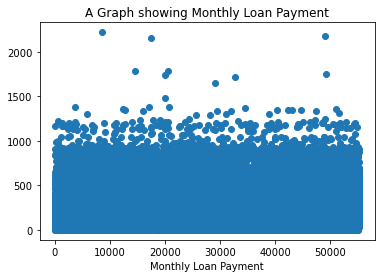

In [65]:
plt.scatter(new_df.index, new_df['MonthlyLoanPayment'])
plt.xlabel('Monthly Loan Payment')
plt.title('A Graph showing Monthly Loan Payment')
#plt.xticks(rotation=45)
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

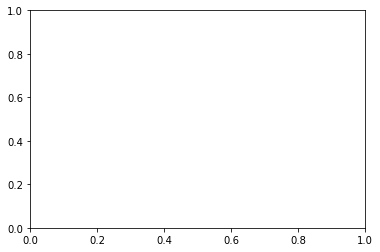

In [66]:
plt.scatter(new_df['IncomeRange'], new_df['MonthlyLoanPayment'])
plt.xlabel('Income Ranges')
plt.ylabel('Monthly Loan Payment')
plt.title('A Graph showing Monthly Loan Payment')
plt.xticks(rotation=45)
plt.show()

In [67]:
new_df['Term'].unique()

array([36, 60, 12], dtype=int64)

## General Question that can be asked in the datasets
#### 1. Does the Monthly Loan Payment affect the Loan Status
#### 2. Does the Increase in term have effect on the Borrower APR
#### 3. Does the Income Ranges have effect on the Stated Monthly Income
#### 4. Does the Income Ranges on the Monthly Loan Payment?
#### 5. Does the Income Ranges have effect on the LP InterestandFees
#### 6. Does the Employment Status have effect on the a Loan Status
#### 7. Does the LP Interest and Fees have effect on the Loan Status

#### 8. Does the Employment Status affect the BorrowerAPR

#### 9. Does the Borrower APR (Interest Rate) have loan status

### Question-Visualization-Observations
## Question
Q1. Does the increase in term have effect on the BorrowerAPR

## Visualization

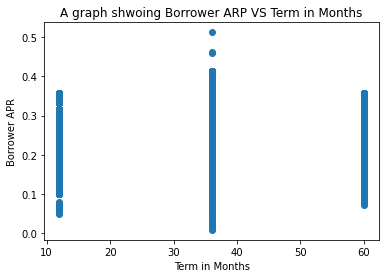

In [68]:
#Wants to examine if the increase in term will have effect on the BorrowerAPR
x= new_df['Term']
y= new_df['BorrowerAPR']
plt.scatter( x, y)
plt.xlabel('Term in Months')
plt.title('A graph shwoing Borrower ARP VS Term in Months')
plt.ylabel('Borrower APR')
plt.show()

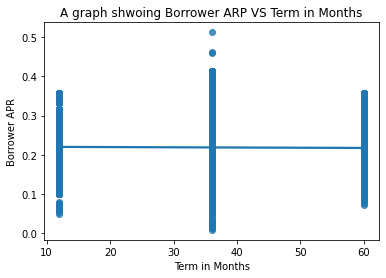

In [69]:
#Wants to examine if the increase in term will have effect on the BorrowerAPR with another plot type
sb.regplot(data=new_df, x='Term', y='BorrowerAPR')
plt.xlabel('Term in Months')
plt.title('A graph shwoing Borrower ARP VS Term in Months')
plt.ylabel('Borrower APR')
plt.show()

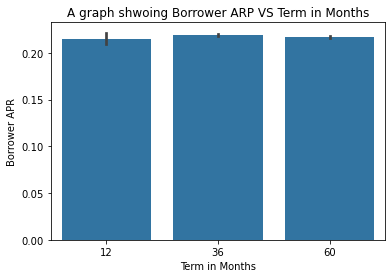

In [70]:
#Wants to examine if the increase in term will have effect on the BorrowerAPR with another plot type
base_color = sb.color_palette()[0]
sb.barplot(data=new_df, x='Term', y='BorrowerAPR', color=base_color)
plt.xlabel('Term in Months')
plt.title('A graph shwoing Borrower ARP VS Term in Months')
plt.ylabel('Borrower APR')
plt.show()

## Conclusion Drawn 

From the visualization above, I can see that there are some outliers especially in the second term thus `36` and Also from the visualization it can be concluded that the Term does not have effect on the Borrower APR

In [71]:
new_df.describe()

,ProsperScore,AvailableBankcardCredit,LoanOriginalAmount,LenderYield,EmploymentStatusDuration,BorrowerRate,LP_InterestandFees,StatedMonthlyIncome,MonthlyLoanPayment,DebtToIncomeRatio,LP_ServiceFees,Term,BorrowerAPR
count,41155.000000,51616.000000,55266.000000,55266.000000,55267.000000,55266.000000,55266.000000,5.526600e+04,55266.000000,51181.000000,55266.000000,55267.000000,55259.000000
mean,5.962848,11247.779991,8338.609851,0.182495,89.523260,0.192556,1080.028187,5.619012e+03,272.271907,0.276288,-54.891990,40.851937,0.218563
std,2.376339,19863.036686,6248.733566,0.074581,94.313729,0.074882,1191.047069,9.333132e+03,191.903943,0.550618,61.084587,10.426270,0.080427
min,1.000000,0.000000,1000.000000,-0.010000,0.000000,0.000000,-2.349900,0.000000e+00,0.000000,0.000000,-664.870000,12.000000,0.008640
25%,4.000000,885.000000,4000.000000,0.123500,19.000000,0.133400,271.462500,3.208333e+03,131.427500,0.140000,-73.085000,36.000000,0.156290
50%,6.000000,4123.000000,6500.000000,0.173000,60.000000,0.183550,700.150000,4.666667e+03,217.740000,0.220000,-34.355000,36.000000,0.209310
75%,8.000000,13183.250000,12000.000000,0.240000,130.000000,0.250000,1459.400000,6.782417e+03,372.150000,0.320000,-13.780000,36.000000,0.283700
max,11.000000,646285.000000,35000.000000,0.492500,755.000000,0.497500,14329.490000,1.750003e+06,2218.530000,10.010000,32.060000,60.000000,0.512290


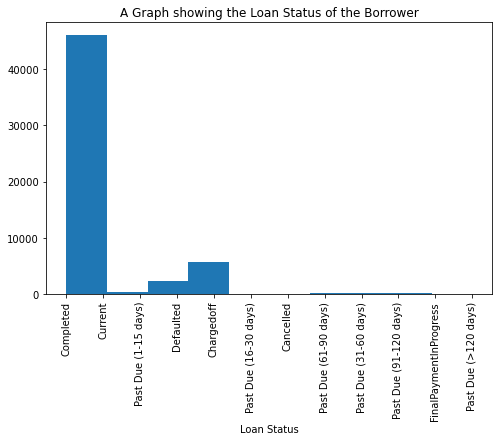

In [72]:
#Let's do some visualization
plt.figure(figsize=[8, 5])
plt.hist(data=new_df, x='LoanStatus')
plt.xlabel('Loan Status')
plt.title('A Graph showing the Loan Status of the Borrower')
plt.xticks(rotation=(90))
plt.show()

In [73]:
# # plotting carat on a standard scale
# binsize = 100
# bins = np.arange(0, new_df['LoanOriginalAmount'].max()+binsize, binsize)


# #plt.hist(data = new_df, x = 'LoanOriginalAmount', bins = bins)
# plt.hist(new_df['LoanOriginalAmount'])
# plt.xlim([0,3.5])
# plt.title('A Graph showing the Employment Status Duration')
# plt.xlabel('EmploymentStatusDuration')
# plt.show()


#plt.show()

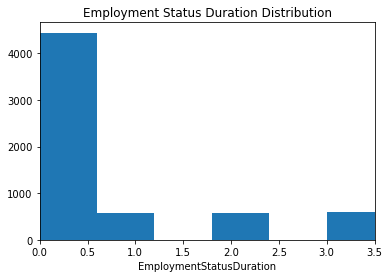

In [74]:
# plotting carat on a standard scale
binsize = 0.6
bins = np.arange(0, new_df['EmploymentStatusDuration'].max()+binsize, binsize)


plt.hist(data = new_df, x = 'EmploymentStatusDuration', bins = bins)
plt.xlim([0,3.5])
plt.title('Employment Status Duration Distribution')
plt.xlabel('EmploymentStatusDuration')
plt.show()

### Question-Visualization-Observations
## Question
Q1. Does the Employment Status have effect on the loan Status

In [75]:
new_df['EmploymentStatus'].unique()

['Self-employed', 'Employed', 'Not available', 'Full-time', 'Other', NaN, 'Not employed', 'Part-time', 'Retired']
Categories (8, object): ['Employed', 'Full-time', 'Not available', 'Not employed', 'Other', 'Part-time', 'Retired', 'Self-employed']

## Visualization

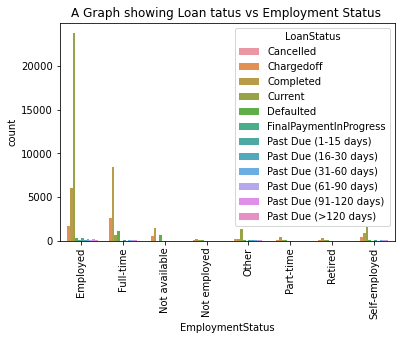

In [76]:
#Getting a countplot since the two variables are qualitative variables
sb.countplot(data=new_df, x='EmploymentStatus', hue='LoanStatus');
plt.title('A Graph showing Loan tatus vs Employment Status ')
plt.xticks(rotation=90);

## Conclusion Drawn 
From the visualization above, I can see that the Employment Status with value `Full-Time`had the potency to complete the Loan Payment or Cancell the Loan Unlike the Employment Status of `Not employed`

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### For the Univariate Exploration, Let me start with some features like the Borrower APR, Loan Original Amount

In [77]:
#I don't understand why it's not working. 
# Distribution of Borrower APR in percentage 
# binsize = 2
# borrowe_APR_percentage = new_df['BorrowerAPR']*100
# bins = np.arange(new_df['BorrowerAPR'].min()*100, new_df['BorrowerAPR'].max()*100+binsize, binsize)

# plt.figure(figsize=[10, 5])
# plt.hist(x = borrowe_APR_percentage, bins = bins)
# plt.title('Borrower APR Distribution (%)')
# plt.xlabel('Borrower Annual Percentage Rate (%)')
# plt.ylabel('Count')
# plt.xticks([5, 10, 15, 20, 25, 30, 35, 40], ['5','10', '15', '20', '25', '30', '35', '40'])
# plt.show()

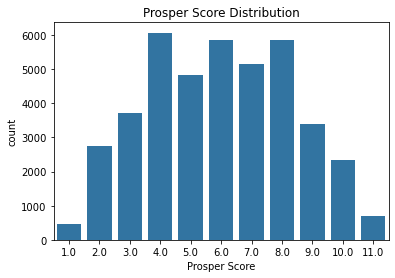

In [78]:
#Prosper Score Distribution (range form 1 to 10)
base_color = sb.color_palette()[0]
sb.countplot(data=new_df, x= 'ProsperScore', color=base_color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score');

In [79]:
#I don't why it's not working. 

# Loan Original Amount Distribution
# binsize = 1000
# bins = np.arange(new_df['LoanOriginalAmount'].min(), new_df['LoanOriginalAmount'].max()+binsize, binsize)

# plt.figure(figsize=[10, 8])
# plt.hist(data = new_df, x = 'LoanOriginalAmount', bins = bins)
# plt.title('Loan Original Amount Distribution')
# plt.xlabel('Loan Original Amount in $')
# plt.show()

In [80]:

#I don't why it's not working please help me

# Putting Loan Original Amount in a log-scale
# log_binsize = 0.025
# bins = 10 ** np.arange(3, np.log10(new_df['LoanOriginalAmount'].max())+log_binsize, log_binsize)

# plt.figure(figsize=[8, 5])
# plt.hist(data = new_df, x = 'LoanOriginalAmount', bins = bins)
# plt.title('Loan Original Amount distribution with Log scale')
# plt.xscale('log')
# plt.xticks([500, 1e3, 2e3,3e3, 5e3, 1e4, 2e4, 3e4, 5e4], ['500', '1k', '2k', '3k', '5k', '10k', '20k', '30k', '50K'])
# plt.xlabel('Loan Original Amount ($)')
# plt.ylabel('count')
# plt.show()

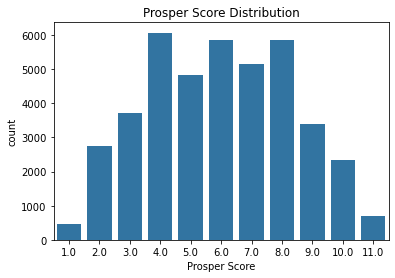

In [81]:
#Prosper Score Distribution (range form 1 to 10)
base_color = sb.color_palette()[0]
sb.countplot(data=new_df, x= 'ProsperScore', color=base_color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score');

#### Prosper Scores are almost normally distributed and values 4, 6, and 8 are the most common. 

In [82]:
#Checking loans' term (expressed in months)
new_df['Term'].value_counts()

36    42578
60    11931
12      758
Name: Term, dtype: int64

- So we can see that in years terms can be either 1 year (12 month) or 3 years (36 months) or 5 years (60 months)

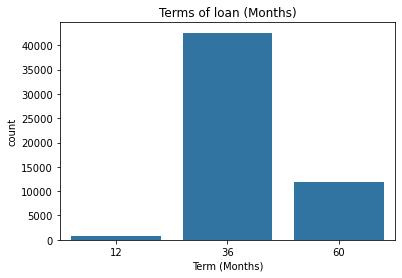

In [83]:
base_color = sb.color_palette()[0]
sb.countplot(data=new_df,x= 'Term',color=base_color);
plt.title('Terms of loan (Months)')
plt.xlabel('Term (Months)');

- We see that most of the values are in the 3 years (36 months)

In [84]:
#I don't why it's not working. 

#Lender Yield Distribution
# binsize = 0.01
# bins = np.arange(new_df['LenderYield'].min(), new_df['LenderYield'].max()+binsize, binsize)

# plt.figure(figsize=[8, 5])
# plt.hist(data = new_df, x = 'LenderYield', bins = bins)
# plt.xlabel('Lender Yield')
# plt.title('Lender Yield Distribution')
# plt.ylabel('count')
# plt.show()

In [85]:
#I don't why it's not working please explain how to solve it

# Service Fees Distribution
# binsize = 50
# bins = np.arange(new_df['LP_ServiceFees'].min(), new_df['LP_ServiceFees'].max()+binsize, binsize)

# plt.figure(figsize=[10, 5])
# plt.hist(data = new_df, x = 'LP_ServiceFees', bins = bins)
# plt.xlabel('Service Fees $')
# plt.title('Service Fees Distribution')
# plt.ylabel('count')
# plt.show()

In [86]:
#I don't why it's not working. 

# Monthly loan payment distribution
# binsize = 50
# bins = np.arange(0, new_df['MonthlyLoanPayment'].max()+binsize, binsize)

# plt.figure(figsize=[8, 5])
# plt.hist(data = new_df, x = 'MonthlyLoanPayment', bins = bins)
# plt.xlabel('Loan Monthly Payment ($)')
# plt.ylabel('count')
# plt.title('Monthly loan payment distribution')
# plt.show()

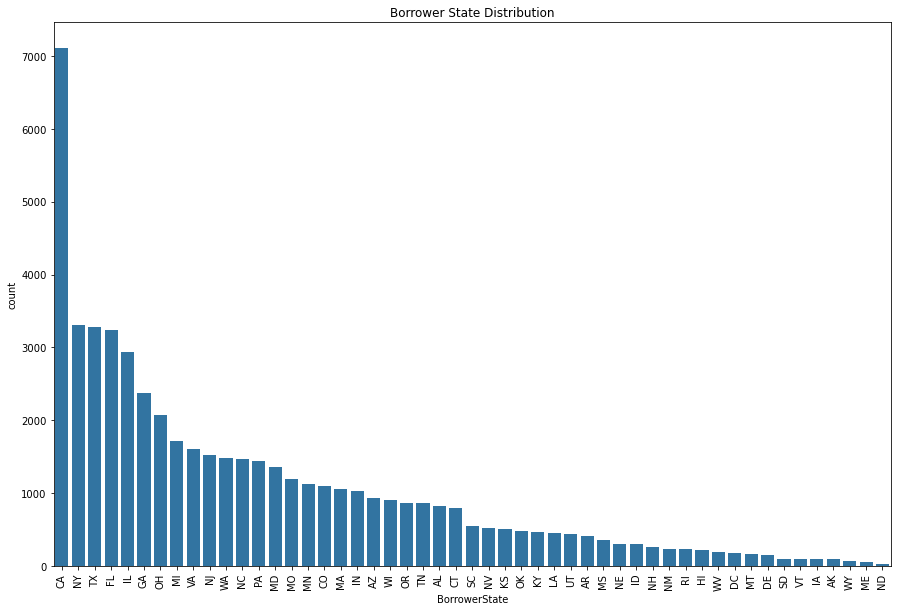

In [87]:
#Borrower State Distrobution
cat_order = new_df['BorrowerState'].value_counts().index
plt.figure(figsize=[15, 10])
sb.countplot(data=new_df,x='BorrowerState',color=base_color, order=cat_order);
plt.title('Borrower State Distribution');
plt.xticks(rotation=90);

- We can see that California (CA), Texas (TX) and New York (NY) have the 3 biggest numbers of loans originated in that period of time. 

Text(0.5, 1.0, 'Borrower Income Range Distribution')

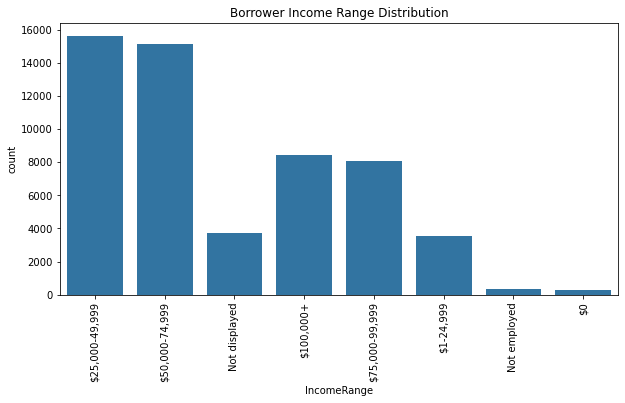

In [88]:
#Borrower Income Range Status Distrobution
plt.figure(figsize=[10, 5])
sb.countplot(data=new_df,x='IncomeRange',color=base_color);
plt.xticks(rotation=90)
plt.title('Borrower Income Range Distribution')

- We can see that People with income range of $25000-49999 are the ones who are taking loans most 

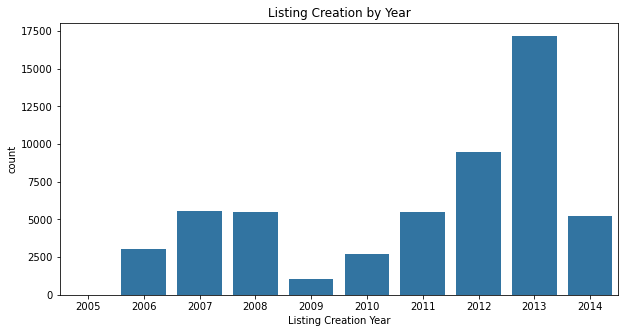

In [89]:
# Listing Creation  by Year
plt.figure(figsize=[10, 5])
sb.countplot(data=new_df,x=new_df['ListingCreationDate'].dt.year,color=base_color)
plt.title('Listing Creation by Year')
plt.xlabel('Listing Creation Year');

- The same observation as the previous chart which is expected because we normally create the list every year.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Year 2013 had the highest loan creation. California (CA) had the biggest number of loans.  We can see that People with income range of `$25000-49999` are the ones who are taking loans most. 


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>  Also I had a problem with the Loan Original Amount, Monthly Loan Payment, Service Fees, LenderYield Distribution, and Borrower APR Distributions

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [90]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55267 entries, 0 to 55266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ListingCreationDate        55267 non-null  datetime64[ns]
 1   Occupation                 53557 non-null  category      
 2   ProsperScore               41155 non-null  float64       
 3   BorrowerState              52629 non-null  category      
 4   IncomeRange                55266 non-null  object        
 5   AvailableBankcardCredit    51616 non-null  float64       
 6   ClosedDate                 26756 non-null  datetime64[ns]
 7   LoanOriginalAmount         55266 non-null  float64       
 8   EmploymentStatus           54198 non-null  category      
 9   ListingCategory (numeric)  55266 non-null  category      
 10  LenderYield                55266 non-null  float64       
 11  EmploymentStatusDuration   55267 non-null  int32         
 12  Borr

In [91]:
categorical_variables = ['Occupation', 'BorrowerState', 'EmploymentStatus', 'ListingCategory (numeric)', 'LoanStatus']
numeric_variables = ['Term', 'ProsperScore', 'LoanOriginalAmount', 'LenderYield', 'BorrowerRate', 'StatedMonthlyIncome', 'MonthlyLoanPayment','LP_ServiceFees', 'LP_InterestandFees', 'BorrowerAPR']

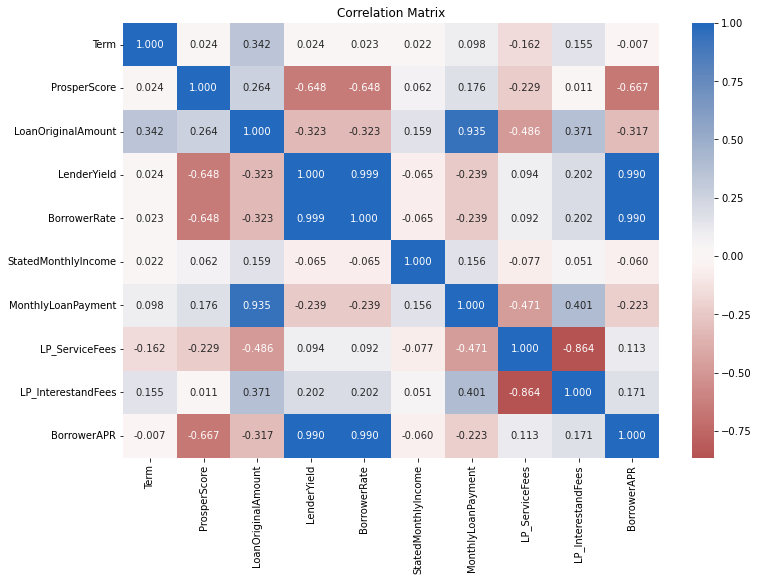

In [92]:
# Correlation matrix for all numeric variables
plt.figure(figsize = [12, 8])
sb.heatmap(new_df[numeric_variables].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title('Correlation Matrix') 
plt.show()

In [93]:
# plot matrix: sample 500 loans so that plots are clearer and
# they render faster
# samples = np.random.choice(new_df.shape[0], 500, replace = False)
# new_df_samp = new_df.loc[samples,:]

# g = sb.PairGrid(data = new_df_samp, vars = numeric_variables)
# g = g.map_diag(plt.hist, bins = 20);
# g.map_offdiag(plt.scatter);

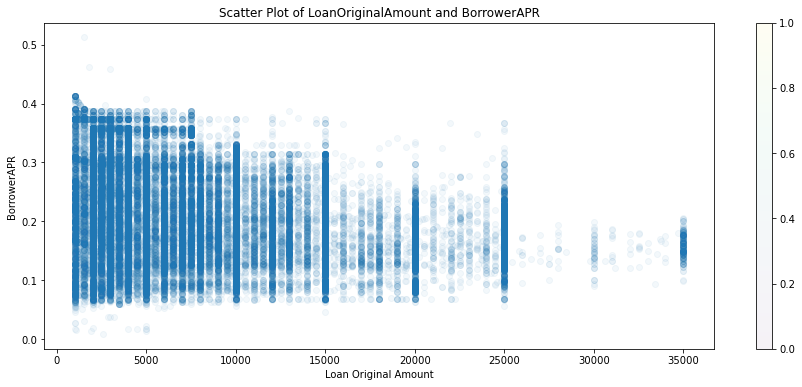

In [97]:
# Checking the relation between LoanOriginalAmount and BorrowerAPR

plt.figure(figsize = [15, 6]) 
#plt.subplot(1, 2, 1)
plt.scatter(data = new_df, x = 'LoanOriginalAmount', y = 'BorrowerAPR',  alpha =  0.05)
plt.title('Scatter Plot of LoanOriginalAmount and BorrowerAPR')
plt.xlabel('Loan Original Amount')
plt.ylabel('BorrowerAPR');
plt.colorbar();

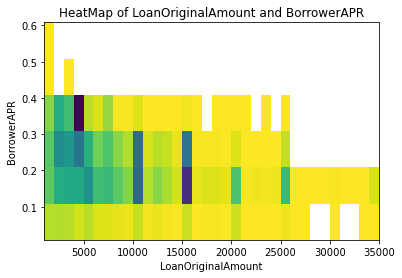

In [98]:

#plt.subplot(1, 2, 2)
bins_x = np.arange(new_df['LoanOriginalAmount'].min(), new_df['LoanOriginalAmount'].max()+1000, 1000)
bins_y = np.arange(new_df['BorrowerAPR'].min(), new_df['BorrowerAPR'].max()+0.1, 0.1)
plt.hist2d(data = new_df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', bins = [bins_x, bins_y], 
               cmap = 'viridis_r', cmin = 0.5)
plt.title('HeatMap of LoanOriginalAmount and BorrowerAPR')
plt.xlabel('LoanOriginalAmount')
plt.ylabel('BorrowerAPR');

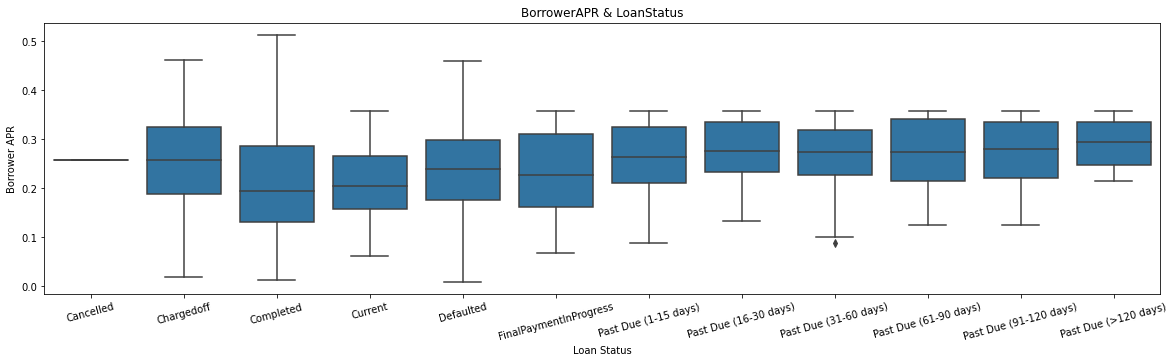

In [99]:
# Borrower APR vs Status of Loan 
plt.figure(figsize = [20, 5])
sb.boxplot(data=new_df,y='BorrowerAPR',x='LoanStatus',color=base_color);
plt.title('BorrowerAPR & LoanStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Loan Status');
plt.xticks(rotation=15);

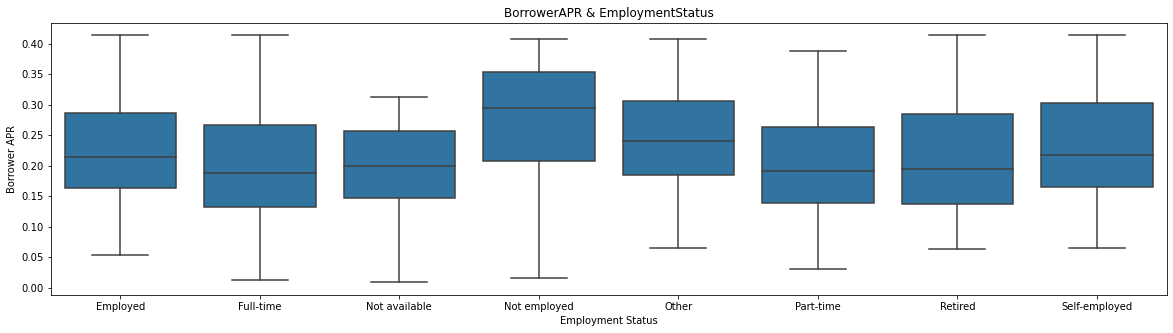

In [100]:
# Borrower APR vs Employment status
plt.figure(figsize = [20, 5])

sb.boxplot(data=new_df,y='BorrowerAPR',x='EmploymentStatus',color=base_color);
plt.title('BorrowerAPR & EmploymentStatus');
plt.ylabel('Borrower APR');
plt.xlabel('Employment Status');

- On BorrowerAPR vs LoanStatus graph we notice that Current and completed loans have lower rate than the past-due loans and have lower mean. 

- On BorrowerAPR vs Employment status graph we notice that Employed people have lower IQR than not employed. 

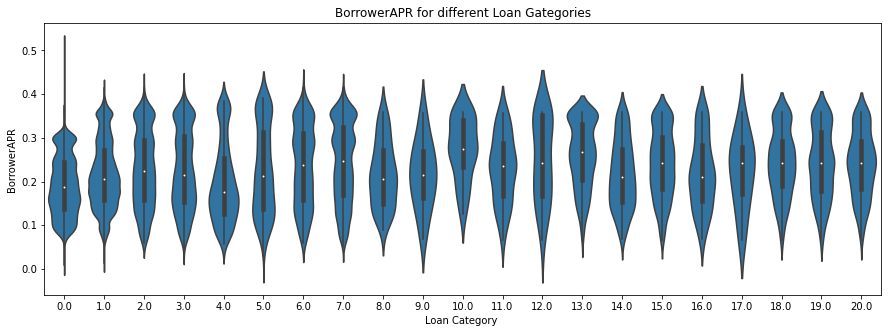

In [101]:
plt.figure(figsize = [15, 5])
sb.violinplot(data=new_df,x='ListingCategory (numeric)', y='BorrowerAPR',color=base_color);
plt.title('BorrowerAPR for different Loan Gategories')
plt.xlabel('Loan Category ');
plt.ylabel('BorrowerAPR');

- We can see that Cosmetic Procedure are given higer interest rates with data distributed well in it.

- Listing Category: The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> From the relation between EmploymentStatus and BorrowerAPR:

- People who are not employed receive high interest rate compared to the employed.

- The higher the income, the lower the interest rate.

Original loan amount was lowest just after 2008 financial crisis, after that the amount is increasing over the year. From 2013 to 2014 , amount gets really big.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The loan status for the past dues have a high interest rate. Number of Defaulted loans for Self-employed people are larger than those for Not Employed

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

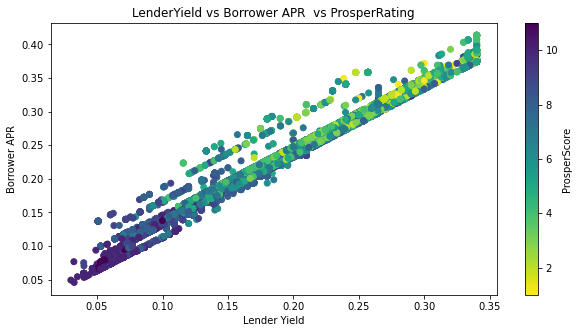

In [102]:
# LenderYield vs Borrower APR  vs ProsperRating
plt.figure(figsize = [10, 5])
plt.scatter(data=new_df,x='LenderYield',y = 'BorrowerAPR',c='ProsperScore',cmap = 'viridis_r')
plt.colorbar(label = 'ProsperScore');
plt.title('LenderYield vs Borrower APR  vs ProsperRating');
plt.xlabel('Lender Yield');
plt.ylabel('Borrower APR');

We can see that the relationship between all variables are clear. Borrower APR and Lender yield are directly positively correlated as when the interest borrowers pays more , the lender yield will increase. Higher the prosper score lower will lower borrower apr and then the lender yield will also be lower.

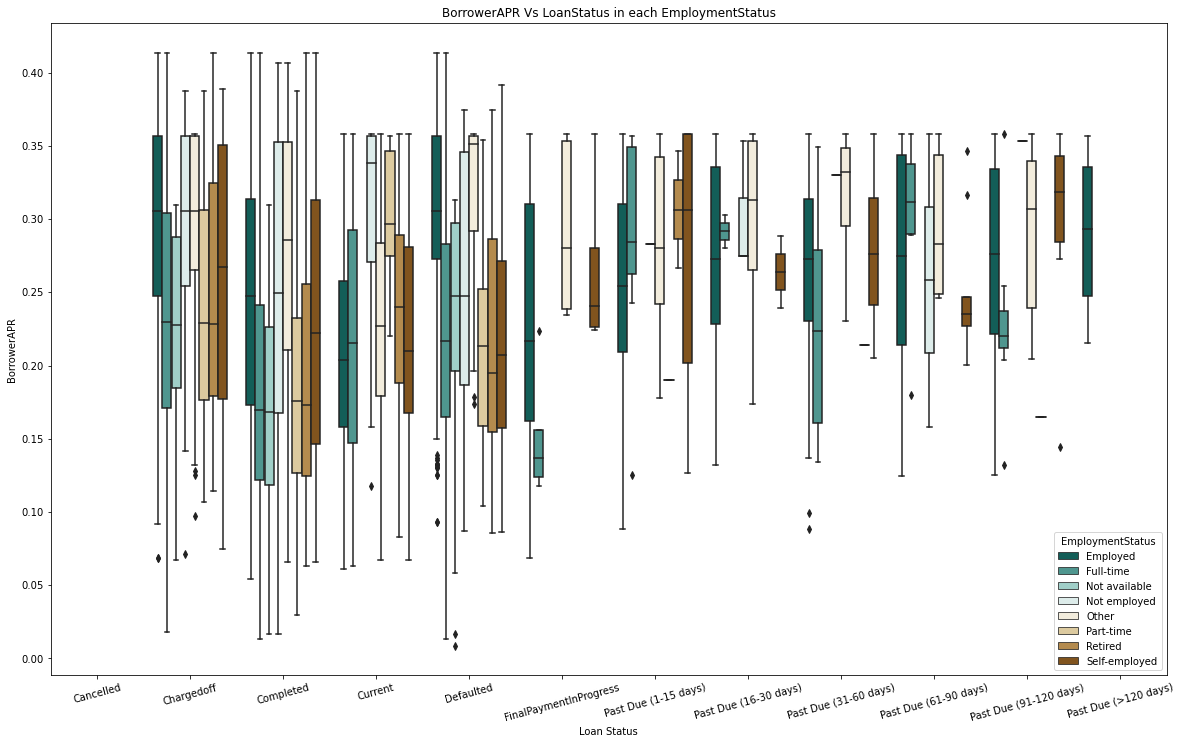

In [110]:
# LoanStatus Vs BorrowerAPR in each EmploymentStatus
plt.figure(figsize=[20,12])
sb.boxplot(x="LoanStatus", y="BorrowerAPR", hue="EmploymentStatus", data=new_df, palette="BrBG_r");
plt.title('BorrowerAPR Vs LoanStatus in each EmploymentStatus');
plt.xlabel('Loan Status');
plt.ylabel('BorrowerAPR');
plt.xticks(rotation = 15);

- According to the visualization with  each category of loan status, the lowest APR is for Employed and Full-time. Whereas highest APR is for Not employed.
- Also, most of the high BorrowerAPR are on the chargeoff, completed and current.
- We notice some outliers in chargeoff and defaulted loan status and very few on current and the past due(16-30 days).

In [72]:
new_df['LoanStatus'].value_counts()

Current                   27426
Completed                 18539
Chargedoff                 5799
Defaulted                  2418
Past Due (1-15 days)        381
Past Due (31-60 days)       191
Past Due (91-120 days)      152
Past Due (61-90 days)       143
Past Due (16-30 days)       111
FinalPaymentInProgress       97
Past Due (>120 days)          9
Cancelled                     1
Name: LoanStatus, dtype: int64

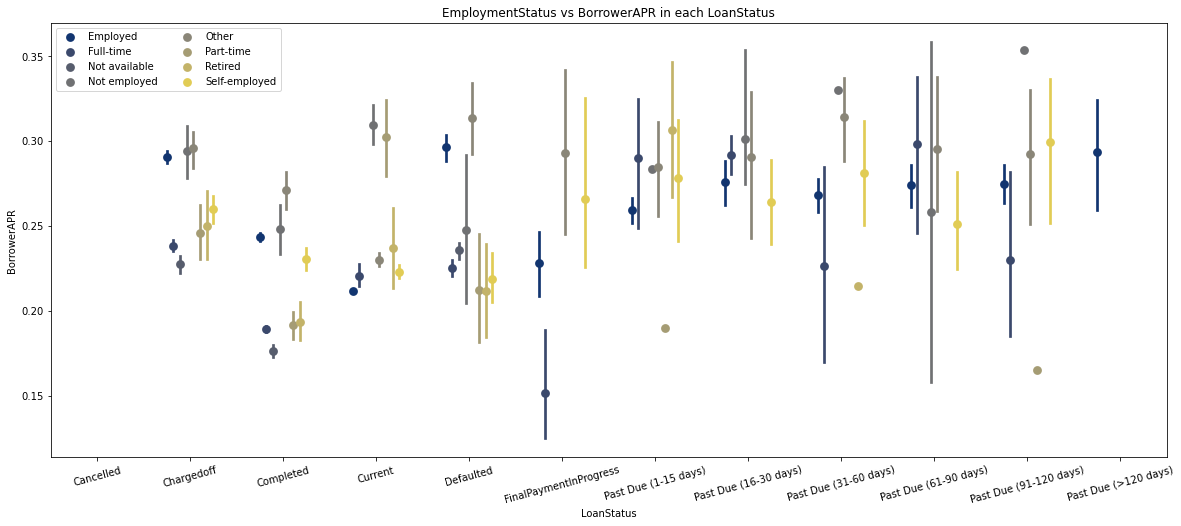

In [112]:
# EmploymentStatus vs BorrowerAPR in each LoanStatus
fig = plt.figure(figsize = [20,8])
ax = sb.pointplot(data = new_df, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'EmploymentStatus', linestyles = "",
                  dodge = 0.5, palette = 'cividis')
plt.title('EmploymentStatus vs BorrowerAPR in each LoanStatus')
plt.ylabel('BorrowerAPR')
plt.xticks(rotation=15)
plt.legend(ncol=2)
plt.show();

- Yea so according to the diagram, Past Due loans generally have higher interest rates in all employment statuses

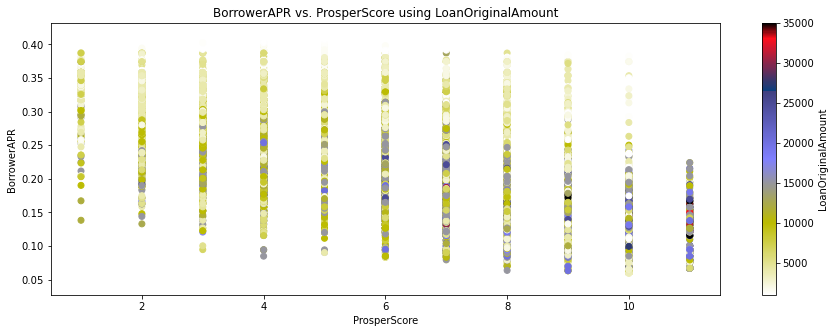

In [113]:
# BorrowerAPR vs. CreditScoreRangeUpper & CreditScoreRangeUpper
plt.figure(figsize = [15, 5]) 
cm = plt.cm.get_cmap('gist_stern_r')
plt.scatter(data=new_df[new_df['StatedMonthlyIncome']<20000],x='ProsperScore',y='BorrowerAPR',c='LoanOriginalAmount',cmap=cm) 
plt.colorbar(label = 'LoanOriginalAmount')
plt.title('BorrowerAPR vs. ProsperScore using LoanOriginalAmount')
plt.xlabel('ProsperScore')
plt.ylabel('BorrowerAPR');

- Most of the loans with higher amounts (>$20,000) are taken by people with higher prosper score (10 and above)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> 
- We see that Employed people are diverse regarding the Loan Status and BorrowerAPR as they have sometimes high borrower rate like in chargeoff and sometimes low borrower rate like in the past dues.
- Employees with Full-Time and part-time tend to have lower BorrowerAPR across all loan status categories.
- Employees with Not-Employed & Self-Employed tend to have higher BorrowerAPR in some areas like the past dues but lower BorrowerAPR in the current and completed status.

### Were there any interesting or surprising interactions between features?

> Scatter plot and Heatmap were also created to find out that ProsperScore and BorrowerAPR were negatively correlated as higher the prosper score lower will be the risk attached hence lower will be the APR and that further lowers down the yield.

## Conclusions
>I am very glad to do this visualization with the Prosper Loan Dataset even though I faced certain difficulties I couldn't rectify. 



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

